# Chapter 6: Decision Trees

**Tujuan:** Memahami cara kerja Decision Tree untuk klasifikasi & regresi, kriteria pemisahan, regularisasi, dan interpretasi model.

---

## 1. Apa itu Decision Tree?

* Model berbentuk pohon:

  * Node internal = uji satu fitur
  * Edge = hasil split
  * Leaf = prediksi kelas (klasifikasi) atau nilai (regresi)

* **Kelebihan:**

  * Mudah diinterpretasi
  * Tidak perlu banyak preprocessing
  * Bekerja untuk data campuran (numerik & kategorikal)

* **Kekurangan:**

  * Mudah overfit
  * Sensitif pada perubahan data kecil

---

## 2. Cara Melatih (CART Algorithm)

1. Mulai di root node

2. Untuk setiap fitur & setiap threshold, hitung **impurity**:

   * **Gini index:**
   $G = 1 - \sum_k p_k^2$

   * **Entropy:**
   $H = -\sum_k p_k \log p_k$

3. Pilih split yang **menurunkan impurity** terbanyak

4. Ulangi secara greedy pada setiap child node hingga stopping criterion terpenuhi

---

## 3. Regularisasi / Pruning

Batasi kompleksitas pohon agar tidak overfit:

* `max_depth` — kedalaman maksimal
* `min_samples_split` — minimal sampel per node sebelum split
* `min_samples_leaf` — minimal sampel per leaf
* `max_leaf_nodes` — jumlah maksimal leaf node

---

## 4. Interpretasi & Feature Importance

* Pohon mudah divisualisasi
* Atribut `feature_importances_` mengukur total penurunan impurity oleh masing-masing fitur

---

## 5. Decision Tree untuk Klasifikasi & Regresi

* `DecisionTreeClassifier`
* `DecisionTreeRegressor`

---


In [3]:
# Setup umum
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Fungsi bantu: visualisasi tree (limit pada 3 level)
def show_tree(dt, feature_names, class_names=None):
    plt.figure(figsize=(14,6))
    plot_tree(dt, feature_names=feature_names, class_names=class_names,
              filled=True, max_depth=3, fontsize=10)
    plt.show()

## 1. Contoh Klasifikasi (Iris)

Kita gunakan **DecisionTreeClassifier** pada dataset Iris.

Accuracy (no limit): 1.0


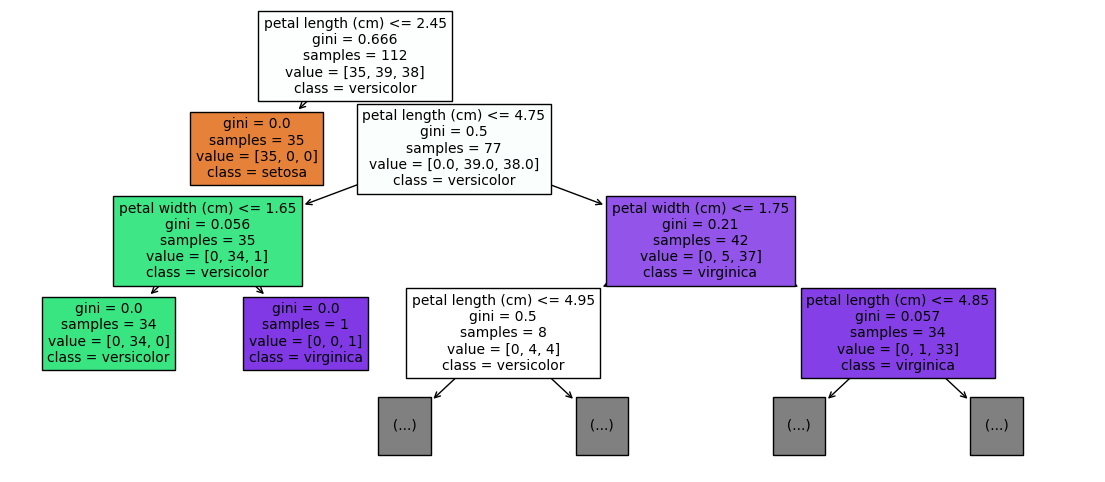

In [4]:
# Load Iris
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Latih tanpa batas kedalaman → cenderung overfit
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (no limit):", accuracy_score(y_test, y_pred))

# Tunjukkan tree
show_tree(clf, iris.feature_names, iris.target_names)

**Regularisasi dengan max_depth**

Kita atur `max_depth=3` untuk mencegah overfitting.

Accuracy (max_depth=3): 1.0


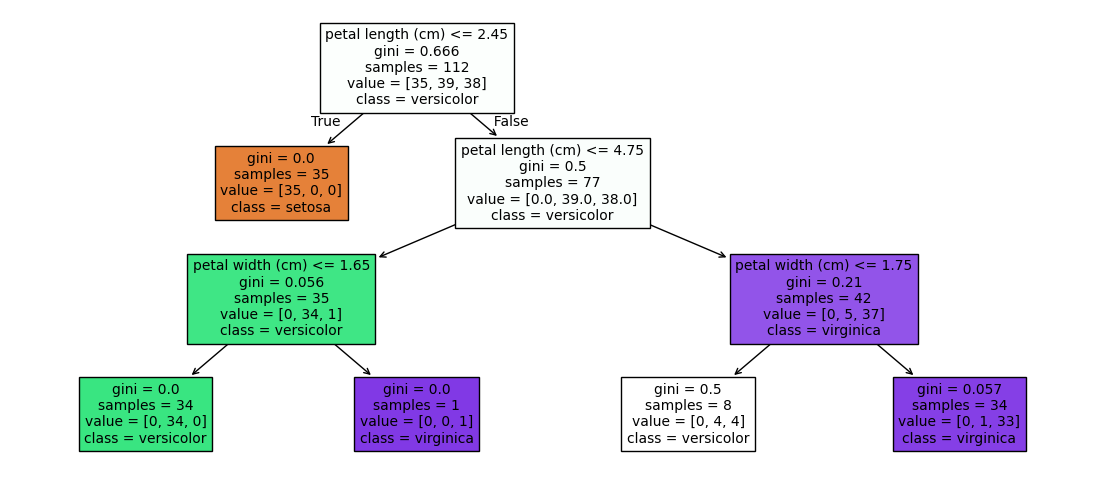

In [5]:
clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)
y_pred_p = clf_pruned.predict(X_test)
print("Accuracy (max_depth=3):", accuracy_score(y_test, y_pred_p))
show_tree(clf_pruned, iris.feature_names, iris.target_names)

## 2. Contoh Regresi (California Housing)

Gunakan **DecisionTreeRegressor** untuk memprediksi harga median rumah.

In [6]:
# Load housing
housing = fetch_california_housing(as_frame=True).frame
X = housing.drop("MedHouseVal", axis=1)
y = housing["MedHouseVal"]

# Split & latih
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_reg.fit(X_train, y_train)

# Evaluasi
y_pred = tree_reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print(f"RMSE DecisionTreeRegressor (max_depth=10): {rmse:.3f}")

RMSE DecisionTreeRegressor (max_depth=10): 0.418


**Feature Importances**

Lihat fitur mana paling memengaruhi keputusan.

In [7]:
import pandas as pd
feat_imp = pd.Series(tree_reg.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=False).head(10)

,0
MedInc,0.609736
AveOccup,0.138073
Latitude,0.070626
Longitude,0.065244
HouseAge,0.042145
AveRooms,0.037468
Population,0.021967
AveBedrms,0.014740


## Ringkasan Chapter 6

- Decision Tree membagi data secara greedy dengan kriteria impurity (Gini/Entropy).  
- Mudah overfit; kendalikan dengan hyperparameter (`max_depth`, `min_samples_leaf`, dll).  
- Visualisasi pohon & feature importance sangat membantu interpretasi.